# Grupo

Carlos Gabriel da Silva Machado - 1815080079

Victor Hugo Santos de Lima - 1915080025

Gabriella Rabelo Monteiro - 1915080011

Josué Costa dos Santos Alves - 1715080615


# Bibliotecas Utilizadas


In [121]:
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Parte 1 - Resolvendo um Problema Linearmente Separável


In [122]:
base_path = "database/"
dataset = np.fromfile(base_path + "dataAll.txt")
np.set_printoptions(threshold=sys.maxsize)
print(f"O dataset é formado por: {dataset.shape} exemplos.")

O dataset é formado por: (3000,) exemplos.


In [123]:
# separando as entradas com seus respectivos valores de x1, x2 e yd


splited_dataset = np.array(np.split(dataset, 1000))

In [124]:
print(f"Desta forma, o data set fica divido da seguinte forma: {splited_dataset.shape}.")
print(f"Por exemplo: {splited_dataset[0]}")

Desta forma, o data set fica divido da seguinte forma: (1000, 3).
Por exemplo: [-363.7884  244.1423    0.    ]


In [125]:
# As primeiras entradas


print(splited_dataset[:5])

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


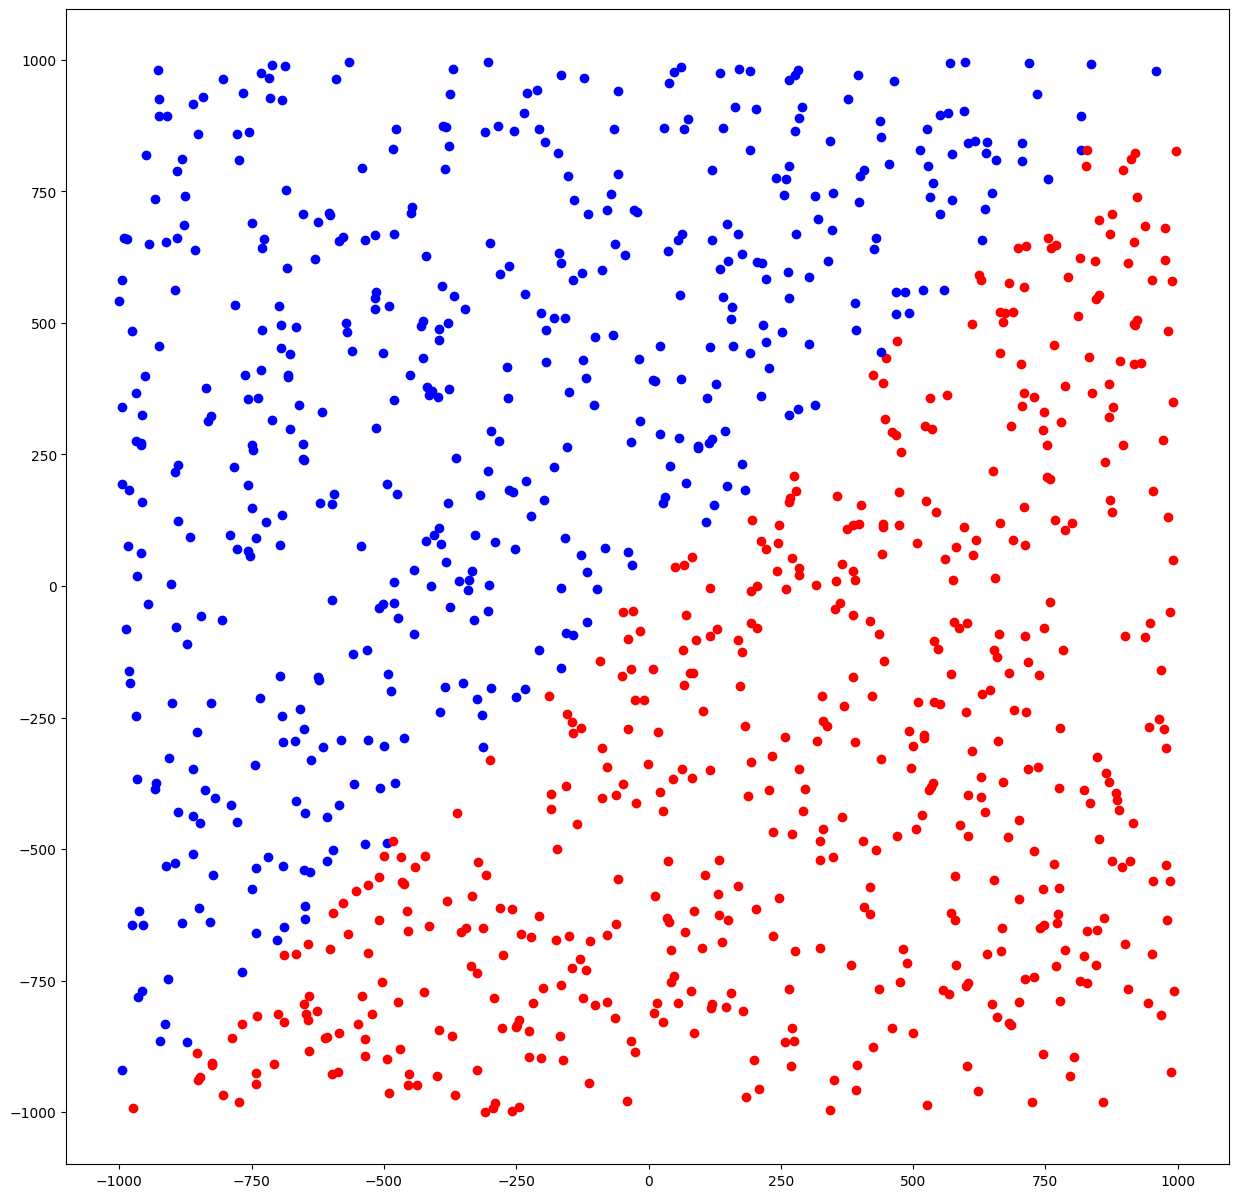

In [126]:
# Distribuição do dataset (graficamente)


plt.subplots(figsize=(15, 15))

for i in range (splited_dataset.shape[0]):
    x = splited_dataset[i][0]
    y = splited_dataset[i][1]
    
    if splited_dataset[i][2] < 1:
        y_blue = splited_dataset[i][1]
        plt.scatter(x, y_blue, c='blue')
    else:
        y_red = splited_dataset[i][1]
        plt.scatter(x, y_red, c='red')

        
plt.show()

In [127]:
# definindo o viés (bias) igual a 1 a cada entrada


splited_dataset_ = np.concatenate((np.ones((splited_dataset.shape[0], 1)), splited_dataset), axis=1)

print(splited_dataset_[0:5])

[[   1.     -363.7884  244.1423    0.    ]
 [   1.      328.7572 -256.7658    1.    ]
 [   1.     -164.9827  613.2164    0.    ]
 [   1.      536.5905  764.9575    0.    ]
 [   1.      314.2297  343.8375    0.    ]]


In [128]:
# Gerando pesos aleatórios no intervalo de [-0.5,0.5)


np.random.seed(0)
weights = np.random.uniform(-0.5, 0.5, 3)
print(f"Pesos: {weights[0:5]}")
weights.reshape(3, 1)

Pesos: [0.0488135  0.21518937 0.10276338]


array([[0.0488135 ],
       [0.21518937],
       [0.10276338]])

In [129]:
# Criar função para a regra delta


def delta_rule(w, l, yd, yp, en):
    new_w = w + (l * (yd - yp) * en)
    return new_w

In [130]:
# Criar função de ativação degrau


def act_func(value):
    if value >= 0:
        return 1
    else:
        return 0

In [131]:
# Criar função do processo de aprendizagem do neurônio Perceptron de Rosenblatt


def learning_process(entradas, pesos, learning_rate, verbose=False):
    i = 0
    j = 0
    epoca = 0
    pesos_antigo = np.ones((len(pesos),1))
    mat_pesos = pesos
    prim_peso = pesos
    ult_peso = np.ones((len(pesos),1))
    alt_pesos = 0
    
    while not np.array_equal(prim_peso, ult_peso):
        epoc_alt = 0
        prim_peso = ult_peso
        
        for i in range(len(entradas)):
            result = 0
            
            for j in range(len(entradas[0]) - 1):
                aux = (entradas[i][j]*pesos[j])
                result = aux + result
            ativacao = act_func(result)
            
            if ativacao != (int(entradas[i][3])):
                pesos = np.squeeze(pesos)
                mat_pesos = delta_rule(pesos, learning_rate, int(entradas[i][3]), ativacao, entradas[i][0:3])
            pesos_antigo = pesos
            novo_p = np.diag(mat_pesos)
            novo_p = novo_p[novo_p != 0]
            pesos = novo_p
            
            if np.array_equal(pesos_antigo, pesos):
                alt_pesos = alt_pesos + 1
                epoc_alt = epoc_alt + 1
        epoca = epoca + 1
        if verbose:
            print("Época", epoca)
            print(f"{epoc_alt} alterações na época {epoca}")
            print("-" * 30)
        ult_peso = pesos

    if verbose:
        print(f"Passaram {epoca} épocas")
        print(f"Ocorreram {alt_pesos} ajustes de peso")
        print("Pesos finais:",pesos)

    return {"weights": pesos, "statistic": {"weights_changes": alt_pesos, "epochs": epoca}}

In [132]:
# Criar função para encontrar a equação da reta que separa linearmente o problema


def find_line(w0 ,w1, w2):
    c = (w0/w2)
    mx = - (w1/w2)

    return (c, mx)

In [133]:
w0, w1, w2 = learning_process(splited_dataset_, weights, 0.1, verbose=True)["weights"]

Época 1
953 alterações na época 1
------------------------------
Época 2
977 alterações na época 2
------------------------------
Época 3
974 alterações na época 3
------------------------------
Época 4
982 alterações na época 4
------------------------------
Época 5
986 alterações na época 5
------------------------------
Época 6
987 alterações na época 6
------------------------------
Época 7
994 alterações na época 7
------------------------------
Época 8
982 alterações na época 8
------------------------------
Época 9
997 alterações na época 9
------------------------------
Época 10
997 alterações na época 10
------------------------------
Época 11
997 alterações na época 11
------------------------------
Época 12
997 alterações na época 12
------------------------------
Época 13
985 alterações na época 13
------------------------------
Época 14
1000 alterações na época 14
------------------------------
Passaram 14 épocas
Ocorreram 13808 ajustes de peso
Pesos finais: [   1.4488135 

In [134]:
# removendo o viés (bias) das entradas



splited_dataset__ = np.array(np.split(dataset, 1000))

print(f"Ao remover o viés: {splited_dataset__.shape} (a quantidade de amostras se mantém)")

print(f"Exemplo:\n{splited_dataset__[:5]}")

Ao remover o viés: (1000, 3) (a quantidade de amostras se mantém)
Exemplo:
[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


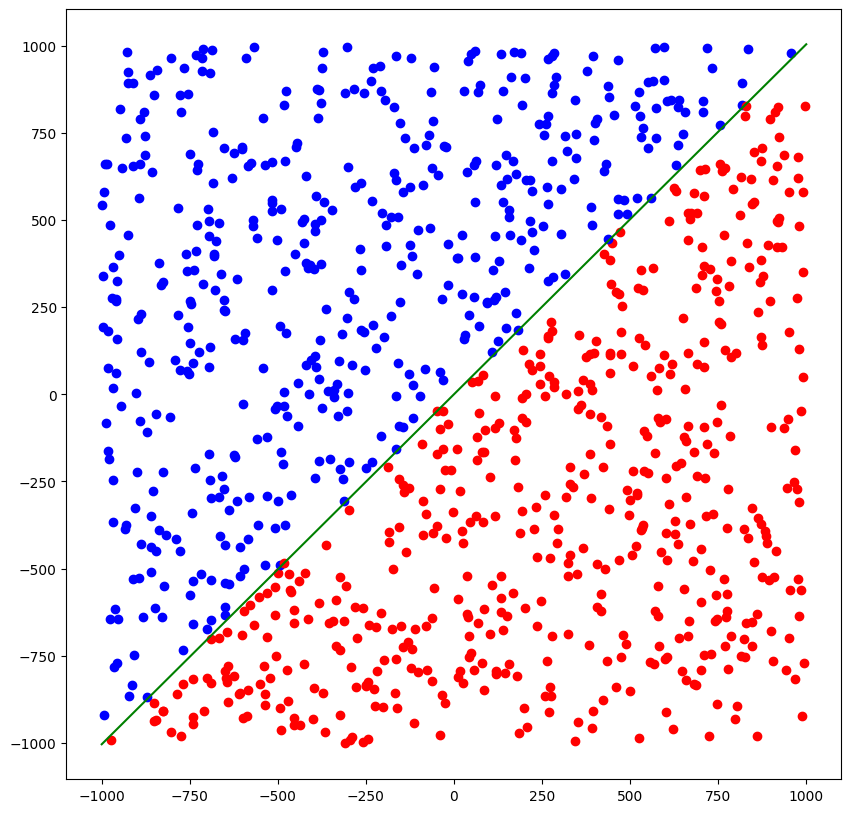

In [135]:
# Gráfico com a reta gerada a partir dos valores resultantes do processo de aprendizado


plt.subplots(figsize=(10, 10))

c, mx =  find_line(w0, w1, w2)
x1 = np.linspace(-1000, 1000, 10)
y1 = mx*x1 - c

plt.plot(x1, y1, 'green')

for i in range (len(splited_dataset)):
    x = splited_dataset[i][0]
    #print(dataAll_split[i][0])
    y = splited_dataset[i][1]
    #print(dataAll_split[i][1])
    #print(dataAll_split[i][2])
    if splited_dataset[i][2] < 1:
        y_blue = splited_dataset[i][1]
        plt.scatter(x, y_blue, c='blue')
    else:
        y_red = splited_dataset[i][1]
        plt.scatter(x, y_red, c='red')


plt.show()

# Parte 2 - Experimentação


In [136]:
# Soma do ultimo digito da matrícula de cada integrante da equipe
# Depois é aplicado o modulo (resto da divisão)


alfa = (9 + 5 + 1 + 5) % 4

print(f"Resultado: {alfa}")

Resultado: 0


In [137]:
# Ler o arquivo com a base de dados

dataset_2 = np.fromfile(base_path + f"data{alfa}.txt").reshape(-1, 3)

print(f"O dataset é formado por: {dataset_2.shape}.\nPossui {dataset_2.shape[0]} exemplos.")

O dataset é formado por: (600, 3).
Possui 600 exemplos.


In [138]:
dataset_2_splited = np.concatenate((np.ones((dataset_2.shape[0], 1)), dataset_2), axis=1)

In [139]:
dataset_2_splited.shape

(600, 4)

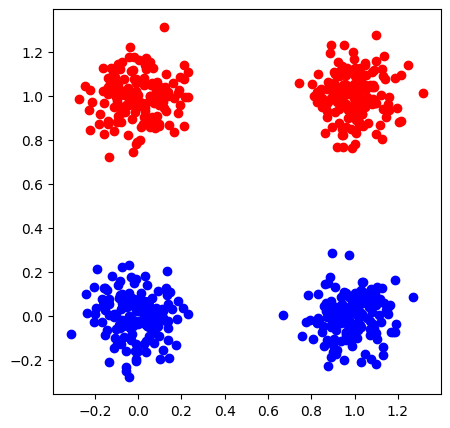

In [140]:
plt.subplots(figsize=(5, 5))

for i in range (dataset_2.shape[0]):
  x = dataset_2[i][0]
  y = dataset_2[i][1]
    
  if dataset_2[i][2] < 1:
    y_blue = dataset_2[i][1]
    plt.scatter(x, y_blue, c='blue')
  else:
    y_red = dataset_2[i][1]
    plt.scatter(x, y_red, c='red')

        
plt.show()

In [141]:
# Amostra 0 de pesos é referente ao intervalo (-0.5, 0.5) -> weights_sample_0
# Amostra 1 de pesos é referente ao intervalo (-100, 100) -> weights_sample_1


def statistic_part_2(dataset_, learning_rate: float):
  all_epochs0 = []
  all_epochs1 = []
  all_weight_changes0 = []
  all_weight_changes1 = []

  for _ in range(10):
    weights_sample_0 = np.random.uniform(-0.5, 0.5, 3)
    weights_sample_1 = np.random.uniform(-100, 100, 3)
    data0 = learning_process(dataset_, weights_sample_0, learning_rate)["statistic"]
    data1 = learning_process(dataset_, weights_sample_1, learning_rate)["statistic"]

    all_weight_changes0.append(data0["weights_changes"])
    all_weight_changes1.append(data1["weights_changes"])

    all_epochs0.append(data0["epochs"])
    all_epochs1.append(data1["epochs"])
  
  all_epochs0 = np.array(all_epochs0)
  all_epochs1 = np.array(all_epochs1)
  all_weight_changes0 = np.array(all_weight_changes0)
  all_weight_changes1 = np.array(all_weight_changes1)

  min_epoch0 = all_epochs0.min()
  min_epoch1 = all_epochs1.min()

  mean_epochs0 = round(all_weight_changes0.mean(), 2)
  mean_epochs1 = round(all_weight_changes1.mean(), 2)

  std_epochs0 = round(all_weight_changes0.std(), 2)
  std_epochs1 = round(all_weight_changes1.std(), 2)


  return {"learning_rate": learning_rate, "min": min_epoch0, "mean": mean_epochs0, "std": std_epochs0, "weight_interval": "(-0.5, 0.5)"},\
    {"learning_rate": learning_rate, "min": min_epoch1, "mean": mean_epochs1, "std": std_epochs1, "weight_interval": "(-100, 100)"}


In [142]:
l_rates = np.array([0.4, 0.01, 0.1])

l_statistic_data = [
  statistic_part_2(dataset_2_splited, l_rates[0]),
  statistic_part_2(dataset_2_splited, l_rates[1]),
  statistic_part_2(dataset_2_splited, l_rates[2])
]

In [143]:
def table_plot(col_names: list, values):
  table = PrettyTable()
  table.field_names = col_names
  
  for i in range(len(values)):
    for j in range(len(values[i])):
      data = values[i][j]
      l_rate = data["learning_rate"]
      weight_interval = data["weight_interval"]
      min_epochs = data["min"]
      changes = f"{data['mean']}+-{data['std']}"
      
      table.add_row([
        l_rate,
        weight_interval,
        changes,
        min_epochs
        ]
      )


  print(table)

In [144]:
col_names = np.array([
  "Taxa de Aprendizado",
  "Intervalo de Pesos",
  "Quantidade de Ajustes",
  "Menor Número de Épocas para Convergência"
])

In [145]:
table_plot(col_names, l_statistic_data)
#l_statistic_data[0][0]

+---------------------+--------------------+-----------------------+------------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de Ajustes | Menor Número de Épocas para Convergência |
+---------------------+--------------------+-----------------------+------------------------------------------+
|         0.4         |    (-0.5, 0.5)     |     1675.6+-238.55    |                    2                     |
|         0.4         |    (-100, 100)     |    7621.1+-4367.68    |                    4                     |
|         0.01        |    (-0.5, 0.5)     |     3180.1+-751.25    |                    3                     |
|         0.01        |    (-100, 100)     |  308530.5+-195246.56  |                   148                    |
|         0.1         |    (-0.5, 0.5)     |     2030.7+-608.29    |                    2                     |
|         0.1         |    (-100, 100)     |   16614.0+-11084.52   |                    8               

Levando em consideração o número de épocas para convergência, as configurações das linhas 1, 2, 3, 5, 6 da tabela aprensentada podem ser consideradas equivalentes, entretanto, quando considerado a quantidade de ajustes dos pesos e o número de épocas para convergência, a linha 1 é a melhor. Em contrapartida, a configuração da linha 4 é a pior visto, que o intervalo de pesos é muito grande e a taxa de aprendizado é muito pequena.


# Parte 3 - Validação Holdout em Problema Não-Linearmente Separável


In [146]:
#carregando arquivo "dataHoldout.txt" do drive


dataHoldout = np.fromfile(base_path + "dataHoldout.txt").reshape(-1, 3)
np.set_printoptions(threshold=sys.maxsize)
len(dataHoldout)

800

In [147]:
#separando as entradas com seus respectivos valores de x1, x2 e yd


# dataHoldout_split = np.split(dataHoldout, (len(dataHoldout)/3))
dataHoldout_split = dataHoldout
# len(dataHoldout_split)
# print(dataHoldout_split[0])

print(dataHoldout_split.shape)

(800, 3)


In [148]:
# mostrando as primeiras entradas


print(dataHoldout_split[:5])

[[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 [-0.46833414 -0.10620722  1.        ]
 [ 0.46304142  0.09405471  1.        ]]


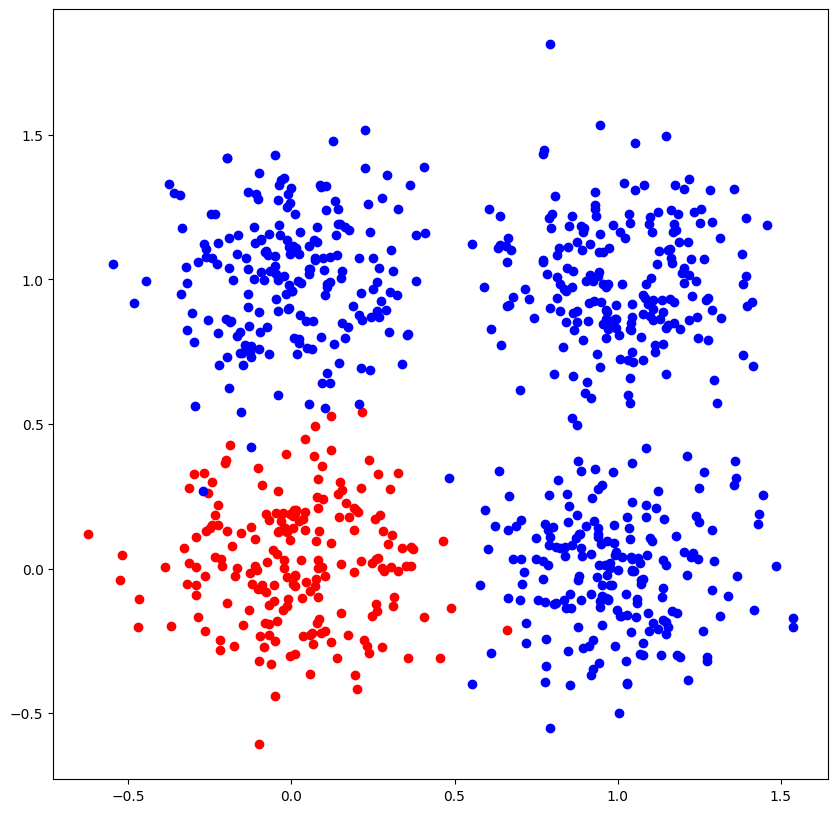

In [149]:
# gráfico dos valores presentes no arquivo "dataHoldout.txt"


fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(dataHoldout_split)):
  x = dataHoldout_split[i][0]
  y = dataHoldout_split[i][1]
  if dataHoldout_split[i][2] < 1:
    y_blue = dataHoldout_split[i][1]
    plt.scatter(x,y_blue, c='blue')
  else:
    y_red = dataHoldout_split[i][1]
    plt.scatter(x, y_red, c='red')


plt.show()

In [150]:
# adicionando o viés 1 a cada entrada


dataHoldout_split = np.concatenate((np.ones((len(dataHoldout_split),1)), dataHoldout_split), axis=1)


# mostrando o array com o viés adicionado


print(dataHoldout_split.shape)
print(dataHoldout_split[0:5])

(800, 4)
[[ 1.         -0.29322959 -0.09065359  1.        ]
 [ 1.          0.07988839  0.21101297  1.        ]
 [ 1.         -0.07825563 -0.08083512  1.        ]
 [ 1.         -0.46833414 -0.10620722  1.        ]
 [ 1.          0.46304142  0.09405471  1.        ]]


In [151]:
# randomizando os dados para separá-los em treino e teste


np.random.shuffle(dataHoldout_split)
print(dataHoldout_split[0:5])

[[ 1.         -0.03486406  1.15509737  0.        ]
 [ 1.         -0.16369884  1.15356926  0.        ]
 [ 1.          1.177833    0.11139963  0.        ]
 [ 1.          0.96886364  0.88843094  0.        ]
 [ 1.          1.24169544  0.18169789  0.        ]]


In [152]:
# função de divisão dos dados em partições de treino e teste


def split_data(data, perc):
  train_qtd = int(len(data)*perc)
  train_split = data[:train_qtd]
  test_split = data[train_qtd:]

  return train_split, test_split

In [153]:
# divindo os dados em treino e teste, a divisão utilizada será 60/40


train, test = split_data(dataHoldout_split, 0.6)

In [154]:
#função do processo de aprendizagem
#foi adotado learning rate de 0.1 e os pesos distribuídos uniformemente no intervalo [-0.5,0,5)


def holdout_learning(entradas, pesos):
    i = 0
    j = 0
    epoca = 0
    pesos_antigo = np.ones((len(pesos),1))
    mat_pesos = pesos
    prim_peso = pesos
    ult_peso = np.ones((len(pesos),1))
    alt_pesos = 0
    
    while epoca < 100:
        np.random.shuffle(entradas)
        epoc_alt = 0
        prim_peso = ult_peso
        print("epoca", epoca+1)
        print("exemplos de treino:")
        
        for k in range(len(train)):
            print(entradas[k][1:])
        for i in range(len(entradas)):
            result=0
            for j in range(len(entradas[0])-1):
                aux = (entradas[i][j]*pesos[j])
                result = aux + result
            ativacao = act_func(result)
            if ativacao != (int(entradas[i][3])):
                pesos = np.squeeze(pesos)
                mat_pesos = delta_rule(pesos, 0.1, int(entradas[i][3]), ativacao, entradas[i][0:3])
            pesos_antigo = pesos
            novo_p = np.diag(mat_pesos)
            novo_p = novo_p[novo_p != 0]
            pesos = novo_p
            if np.array_equal(pesos_antigo, pesos):
                alt_pesos = alt_pesos + 1
                epoc_alt = epoc_alt + 1
        epoca = epoca+1
        ult_peso = pesos

    print("pesos finais:",pesos)

    return pesos

In [155]:
hold_weight= holdout_learning(train, weights)

epoca 1
exemplos de treino:
[0.97608583 0.02046946 0.        ]
[0.27534583 0.92380154 0.        ]
[0.1460631 0.1776204 1.       ]
[0.06747976 0.85670159 0.        ]
[0.87467439 0.18412903 0.        ]
[1.45742494 1.18677285 0.        ]
[1.28878368 0.13512926 0.        ]
[0.99646156 0.05810024 0.        ]
[0.11700025 0.64151874 0.        ]
[0.96199106 0.0127971  0.        ]
[-0.1576937   0.74716362  0.        ]
[-0.11168935  0.10246164  1.        ]
[0.793068   0.90038988 0.        ]
[ 1.02972853 -0.39865267  0.        ]
[1.22803045 0.94427504 0.        ]
[0.97509039 0.854577   0.        ]
[1.0710987  0.79961132 0.        ]
[-0.14901252  0.70308228  0.        ]
[0.32715126 1.24407437 0.        ]
[ 0.99085047 -0.26727656  0.        ]
[1.43301871 0.18982969 0.        ]
[1.38324165 0.98296385 0.        ]
[-0.00480107  1.08784779  0.        ]
[ 0.92459    -0.24547397  0.        ]
[-0.13180539  0.94778105  0.        ]
[1.21906319 1.01421839 0.        ]
[0.36729907 0.07514918 1.        ]
[ 0.35

In [156]:
#função que realizará a predição


def holdout_pred(test_data, weig):
    real_value = np.empty((test_data.shape[0],1))
    pred_value = np.empty((test_data.shape[0],1))
    
    for i in range(len(test_data)):
        result=0
        for j in range(len(test_data[0])-1):
            aux = (test_data[i][j]*weig[j])
            hold_result = aux + result
            #print("valor da iteracao",i,":",result)
        
        hold_act = act_func(hold_result)
        real_value[i] = int(test_data[i][3])
        pred_value[i] = hold_act
    return real_value, pred_value

In [157]:
real, pred = holdout_pred(test,hold_weight)

In [158]:
#convertendo os valores obtidos para números inteiro


real = real.astype(int)
pred = pred.astype(int)

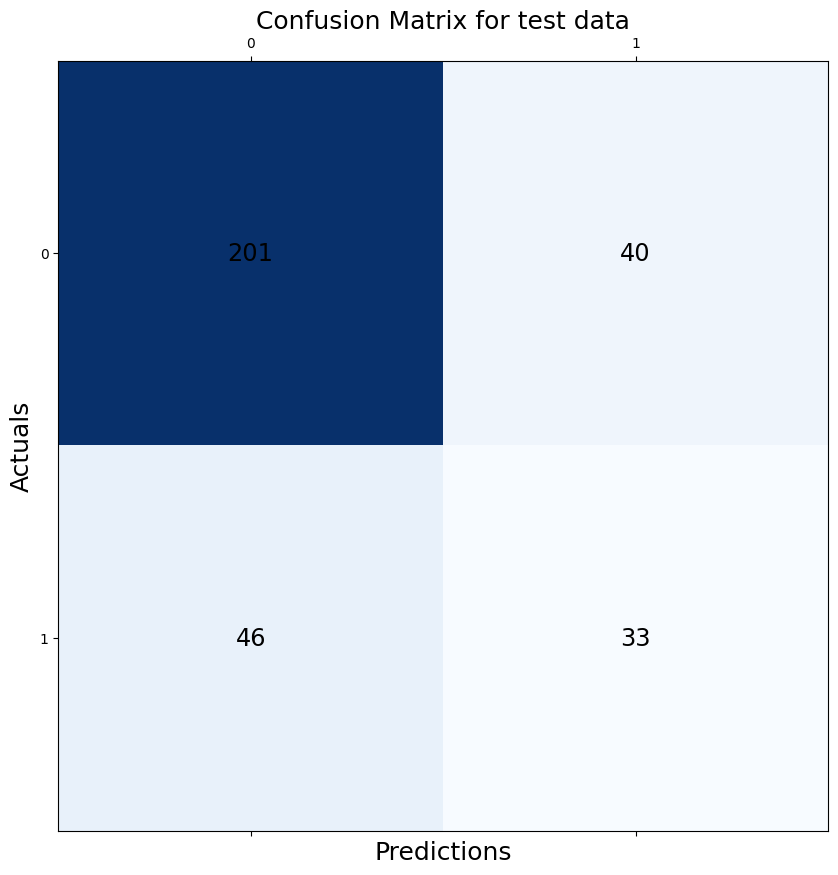

In [159]:
#matriz de confusão para os dados de teste


conf_matrix = confusion_matrix(real, pred)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for test data', fontsize=18)
plt.show()

In [160]:
real_train, pred_train = holdout_pred(train,hold_weight)

In [161]:
result_acc_train = accuracy_score(real_train,pred_train)
print("Acurácia para os dados de treino:", result_acc_train)

Acurácia para os dados de treino: 0.7395833333333334


In [162]:
result_prec_train = precision_score(real_train, pred_train, average='weighted', zero_division=0)
print("Precisão para os dados de treino:",result_prec_train)

Precisão para os dados de treino: 0.7332872347308489


In [163]:
result_rec_train = recall_score(real_train, pred_train, average='weighted')
print("Revocação para os dados de treino:",result_rec_train)

Revocação para os dados de treino: 0.7395833333333334


In [164]:
result_f1_train = f1_score(real_train, pred_train, average='weighted')
print("F1-score para os dados de treino:",result_f1_train)

F1-score para os dados de treino: 0.7361657594952901


A partir dos valores obtidos para as referidas métricas aplicadas sobre os dados de treino, é possível afirmar que a solução alcançará resultados aceitáveis sobre os dados de teste, porém é esperado que os valores das métricas possam diminuir um pouco quando comparados com os valores das métricas obtidas nos dados de treino.

In [165]:
# removendo os viéses dos dados de treino e teste


train = np.delete(train,0,1)
test = np.delete(test,0,1)

In [166]:
print(test[0])
print(train[0])

[0.14182376 1.24306494 0.        ]
[ 0.00531634 -0.05266985  1.        ]


/tmp/ipykernel_3180/3246577162.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'test predictions')

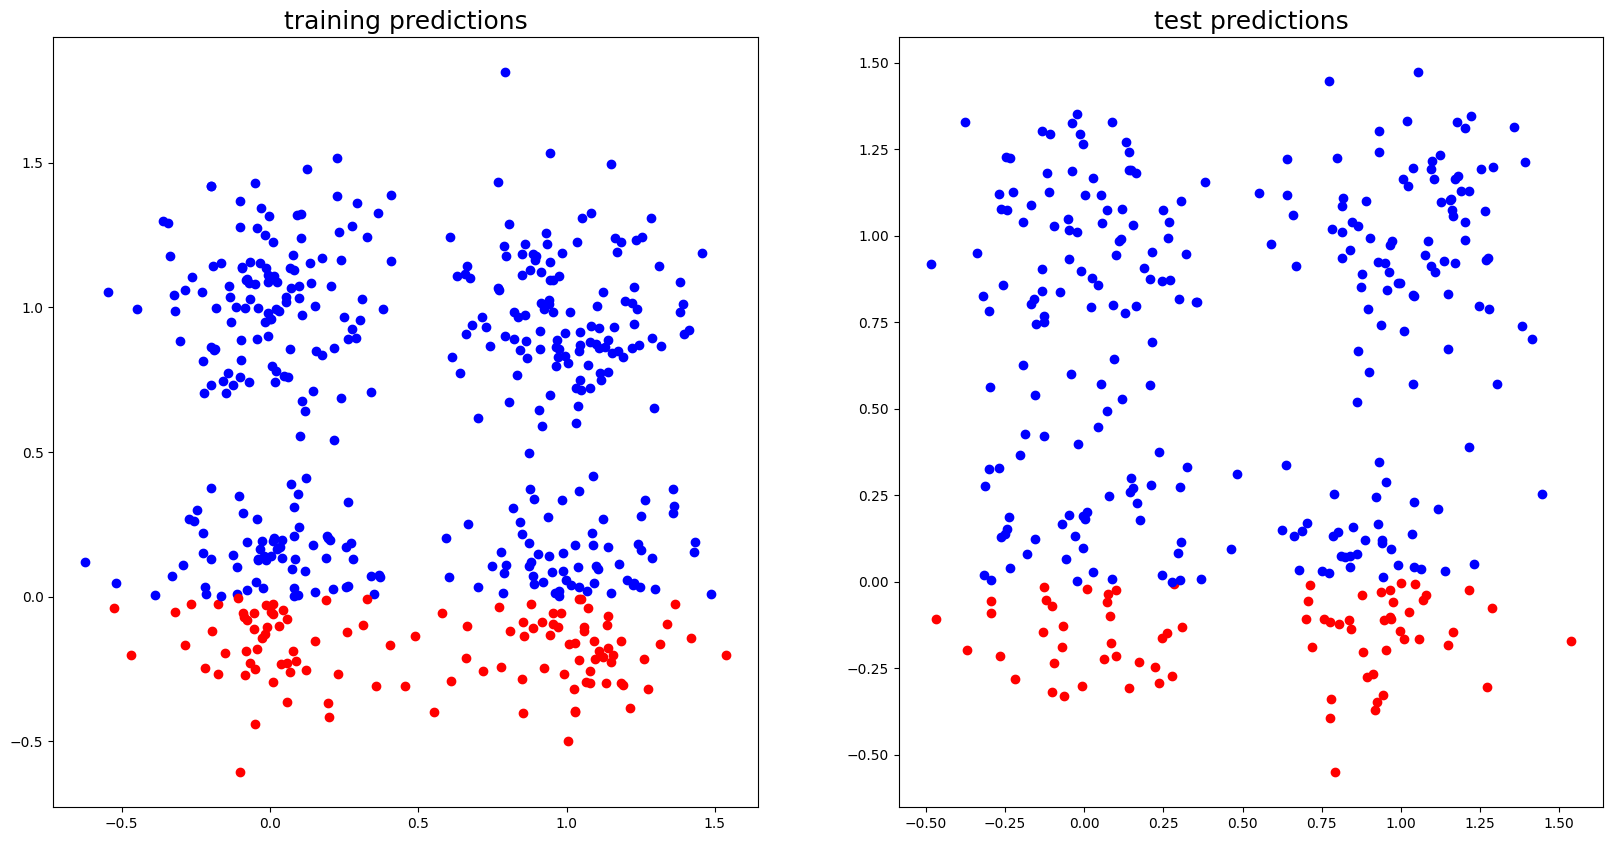

In [167]:
# gráfico das soluções obtidas para os dados de treino e teste"


plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
i=0
for i in range (len(train)):
    x = train[i][0]
    y = train[i][1]
    if pred_train[i] < 1:
        y_blue = train[i][1]
        plt.scatter(x,y_blue, c='blue')
    else:
        y_red = train[i][1]
        plt.scatter(x, y_red, c='red')
plt.title('training predictions', fontsize=18)

plt.subplot(1, 2, 2)
i=0
for i in range (len(test)):
    x = test[i][0]
    y = test[i][1]
    if pred[i] < 1:
        y_blue = test[i][1]
        plt.scatter(x,y_blue, c='blue')
    else:
        y_red = test[i][1]
        plt.scatter(x, y_red, c='red')
plt.title('test predictions', fontsize=18)